In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
df = pd.read_csv(boston_url)
df.drop('Unnamed: 0', axis = 1, inplace=True)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


[Text(0.5, 0, 'Median value of owner-occupied homes')]

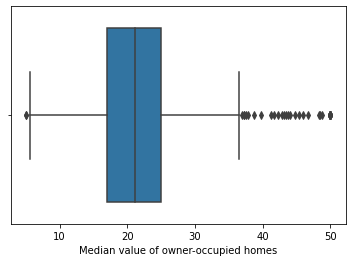

In [3]:
ax = sns.boxplot(y=df['MEDV'], orient='h')
ax.set(xlabel = 'Median value of owner-occupied homes')

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


[Text(0.5, 0, 'Charles River dummy variable')]

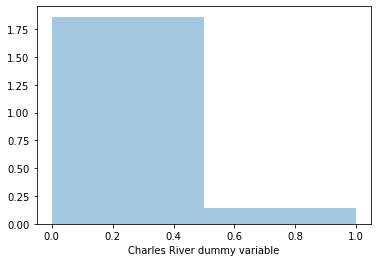

In [4]:
ax = sns.distplot(a=df['CHAS'], bins=2, hist=True)
ax.set(xlabel='Charles River dummy variable')

[Text(0.5, 0, 'Median value of owner-occupied homes for different age groups')]

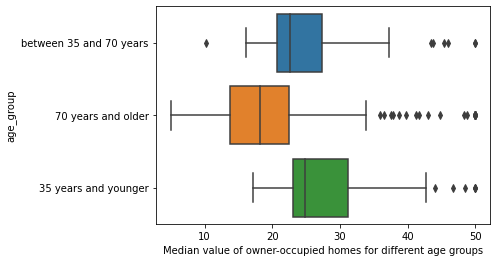

In [5]:
df.loc[(df['AGE'] <= 35), 'age_group'] = '35 years and younger'
df.loc[(df['AGE'] > 35)&(df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
df.loc[(df['AGE'] >=70), 'age_group'] = '70 years and older'
ax = sns.boxplot(x='MEDV', y='age_group', data=df)
ax.set(xlabel='Median value of owner-occupied homes for different age groups')

[Text(0.5, 0, 'Relationship between Nitric oxide concentrations and proportion of non-retail business acres per town')]

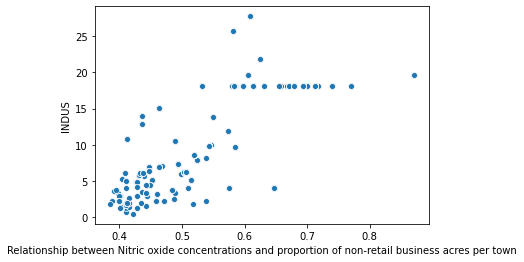

In [6]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=df)
ax.set(xlabel='Relationship between Nitric oxide concentrations and proportion of non-retail business acres per town')

[Text(0.5, 0, 'Pupil to teacher ratio')]

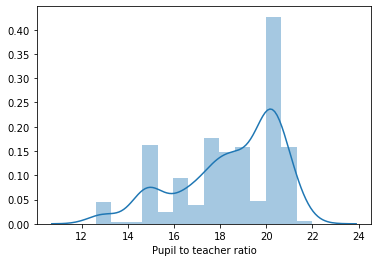

In [7]:
ax = sns.distplot(a=df['PTRATIO'], hist=True)
ax.set(xlabel='Pupil to teacher ratio')

Zero hypothesis:There isn't any significant difference in the median value of houses bounded by the Charles river.

Alternative hypothhesis:There is a significant difference in the median value of houses bounded by the Charles river.

I will use t-test to prove or reject zero hypothesis. P-value must be greater than 0.05 to prove the zero hypothesis.

In [8]:
statistic, p_value = stats.ttest_ind(df[df['CHAS'] == 0.0]['MEDV'], df[df['CHAS'] == 1.0]['MEDV'])
print('P-value is ', p_value)

P-value is  7.390623170519905e-05


Since p_value is less than 0.05, we reject the zero hypothesis and prove the alternative one.

Zero hypothesis: There isn't any difference in Median values of houses for each proportion of owner occupied units built prior to 1940.

Alternative hypothesis: There is a difference in Median values of houses for each proportion of owner occupied units built prior to 1940.

I will use ANOVA to prove or reject zero hypothesis. P-value must be greater than 0.05 to prove the zero hypothesis.

In [9]:
thirty_five_lower = df[df['age_group'] == '35 years and younger']['MEDV']
thirty_five_seventy = df[df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = df[df['age_group'] == '70 years and older']['MEDV']

In [10]:
f_statistic, p_value = stats.f_oneway(thirty_five_lower, thirty_five_seventy, seventy_older)
print('P-value is ', p_value)

P-value is  1.7105011022702984e-15


Since p_value is less than 0.05, we reject the zero hypothesis and prove the alternative one.

Zero hypothesis: there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

Alternative hypothesis: there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

I will use Pearson Correlation to prove or reject zero hypothesis. P-value must be greater than 0.05 to prove the zero hypothesis.

In [11]:
r, p_value = stats.pearsonr(df['NOX'], df['INDUS'])
print('P-value is ', p_value)

P-value is  7.913361061239593e-98


Since p_value is less than 0.05, we reject the zero hypothesis and prove the alternative one.

Null hypothesis: weighted distances to five Boston employment centres are not related to median value.

Alternative hypothesis: weighted distances to five Boston employment centres are related to median value.

In [12]:
X = df['DIS']
y = df['MEDV']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 22 Mar 2021   Prob (F-statistic):           1.21e-08
Time:                        08:08:11   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared is correlation coefficent which is equal in this case to 0.062

In [13]:
np.sqrt(0.062)

0.24899799195977465

Correlation coefficient is 0.25, which means there is a weak correlation between weighted distances to five Boston employment centres and median value of owner-occupied homes.